In [1]:
import matplotlib.pyplot as plt
import numpy as np
import uuid
from mag_field import Bz, Btheta, dBz, dBtheta
from mag_field_Teresa import TBz, TBtheta, TdBz, TdBtheta

# Field plots

In [2]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina' # Useful for running matplotlib on high-dpi displays

plt.rcParams["figure.figsize"] = (6.5, 6)
plt.rcParams['text.usetex'] = True
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams.update({'font.size': 17})

In [3]:
def field_Teresa(r,n,m,q,alpha):
    plt.rcParams["figure.figsize"] = (6.5, 6)
    plt.figure()
    plt.title(r"CC[{},{}] model ($C = {}$, $\tau = {}$)".format(n,m,np.round(q,2), np.round(alpha,2)))
    plt.xlabel('$\overline{r}$')
    plt.ylabel(r"Magnetic field component")
    plt.plot(r, TBtheta(r, n, m, q, alpha), 'g')
    plt.plot(r, TBz(r, n, m, q, alpha), 'b')
    plt.legend([r"$B_\theta$", "$B_z$"], fancybox=True, shadow=True)
    plt.savefig(str(uuid.uuid4()), format="png", dpi=1200)
    plt.show()

def field_GH(r,q,alpha):
    plt.rcParams["figure.figsize"] = (6.5, 6)
    plt.figure()
    plt.title(r"GH modified model ($q = {}$, $\alpha = {}$)".format(np.round(q,2), np.round(alpha,2)))
    plt.xlabel('$\overline{r}$')
    plt.ylabel(r"Magnetic field component")
    plt.plot(r, Btheta(r, q, alpha), 'g--')
    plt.plot(r, Bz(r, q, alpha), 'b--')
    plt.legend([r"$B_\theta$", "$B_z$"], fancybox=True, shadow=True)
    plt.savefig(str(uuid.uuid4()), format="png", dpi=1200)
    plt.show()

def comparison(r,n,m,Cnm,tau,q,alpha):
    plt.rcParams["figure.figsize"] = (7.5, 6)
    plt.figure()
    plt.title(r"CC ($Cnm = {}$, $\tau = {}$) adjusted by GH ($q = {}$, $\alpha = {}$)".format(np.round(Cnm,2), np.round(tau,2), np.round(q,2), np.round(alpha,2)))
    plt.xlabel('$r$')
    plt.ylabel(r"Magnetic field component")
    plt.plot(r, TBtheta(r, n, m, Cnm, tau), 'g')
    plt.plot(r, TBz(r, n, m, Cnm, tau), 'b')
    plt.plot(r, Btheta(r, q, alpha), 'g--')
    plt.plot(r, Bz(r, q, alpha), 'b--')
    plt.legend([r"$B_\theta$", "$B_z$"])
    #plt.savefig(str(uuid.uuid4()))
    plt.show()
    
def modulus_field_GH(r,q,alpha):
    plt.rcParams["figure.figsize"] = (7.5, 6)
    plt.rcParams.update({'font.size': 12})
    plt.figure()
    plt.title(r"GH modified model ($q = {}$, $\alpha = {}$)".format(np.round(q,2), np.round(alpha,2)))
    plt.xlabel('$r$')
    plt.ylabel(r"|B|")
    plt.plot(r, np.sqrt(Btheta(r, q, alpha)**2 + Bz(r, q, alpha)**2), 'k')
    #plt.savefig(str(uuid.uuid4()))
    plt.show()
    
def modulus_comparison(r,n,m,Cnm,tau,q,alpha):
    plt.rcParams["figure.figsize"] = (7.5, 6)
    plt.figure()
    plt.title(r"CC ($Cnm = {}$, $\tau = {}$) and GH ($q = {}$, $\alpha = {}$)".format(np.round(Cnm,2), np.round(tau,2), np.round(q,2), np.round(alpha,2)))
    plt.xlabel('$r$')
    plt.ylabel(r"Magnetic field component")
    plt.plot(r, np.sqrt(TBtheta(r, n, m, Cnm, tau)**2 + TBz(r, n, m, Cnm, tau)**2), 'k')
    plt.plot(r, np.sqrt(Btheta(r, q, alpha)**2 + Bz(r, q, alpha)**2), 'k--')
    #plt.savefig(str(uuid.uuid4()))
    plt.show()

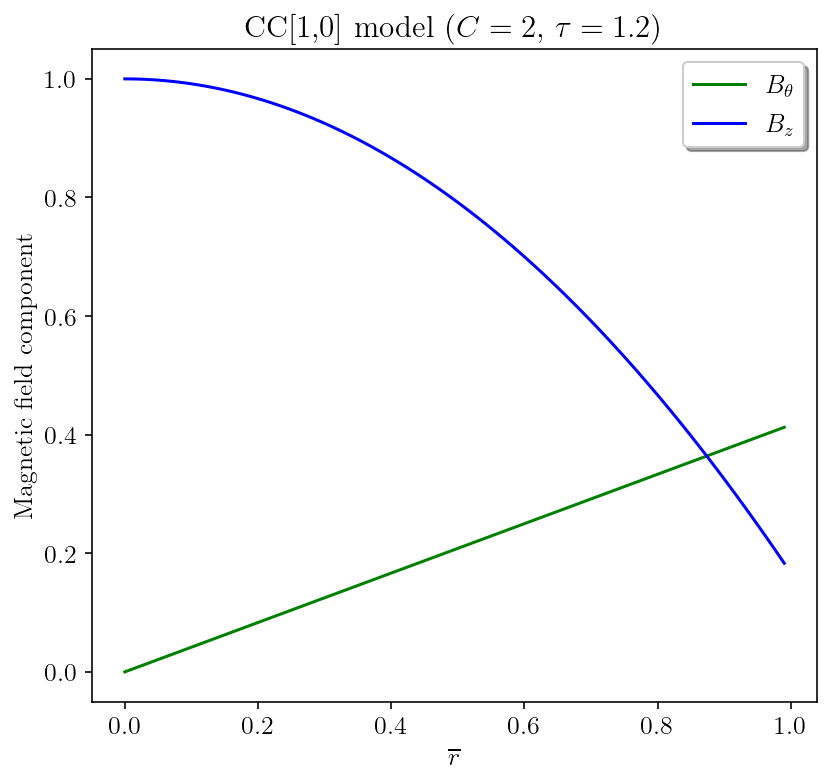

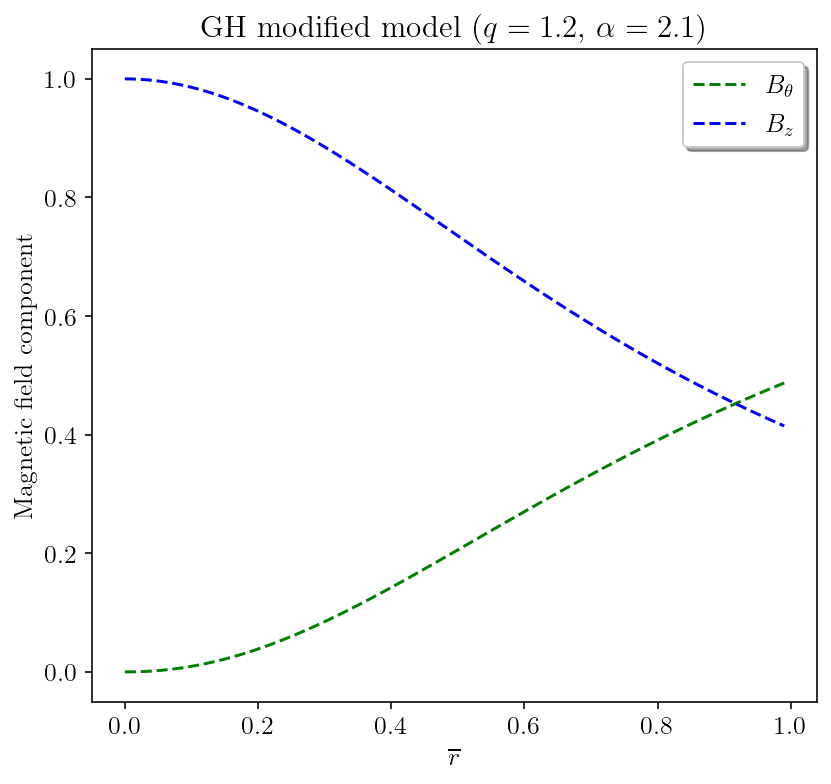

In [17]:
r = np.arange(0, 1., 0.01)

[n,m] = [1,0]
Cnm = 2 # [0.5,2]
tau = 1.2 # [0,4]
field_Teresa(r,n,m,Cnm,tau)

q = 1.2
alpha = 2.1
field_GH(r,q,alpha)

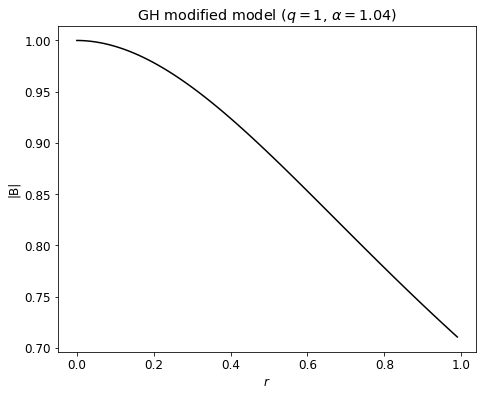

In [13]:
q = 1
alpha = 1.04
modulus_field_GH(r,q,alpha)

In [8]:
from numpy import linalg
def Teresa_to_GH(n, m, Cnm, tau, qs, alphas, N):
    p = 1
    dist = float('inf')
    qmin = 0;
    alphamin = 0;
    r = np.linspace(0, 1, N)
    B_z = TBz(r, n, m, Cnm, tau)
    B_theta = TBtheta(r, n, m, Cnm, tau)
    for q in qs:
        for alpha in alphas:
            newB_z = Bz(r, q, alpha)
            newB_theta = Btheta(r, q, alpha)
            new_dist = np.sqrt(linalg.norm(newB_z - B_z, p)**2 + linalg.norm(newB_theta - B_theta,p)**2)
            if (new_dist < dist):
                dist = new_dist
                qmin = q
                alphamin = alpha
    return [qmin, alphamin]

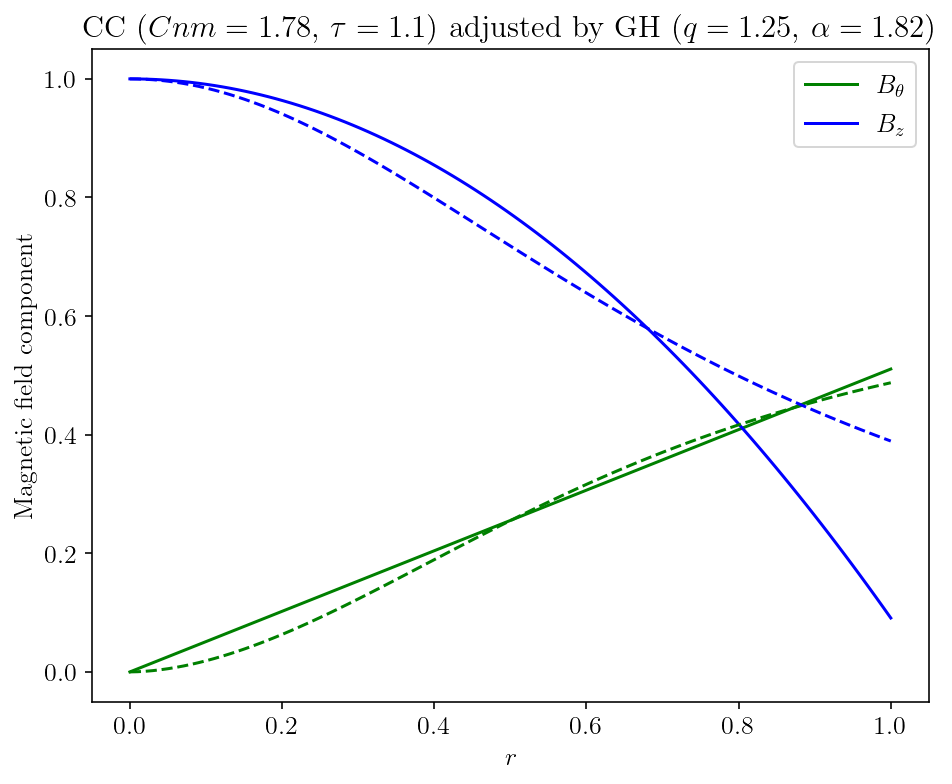

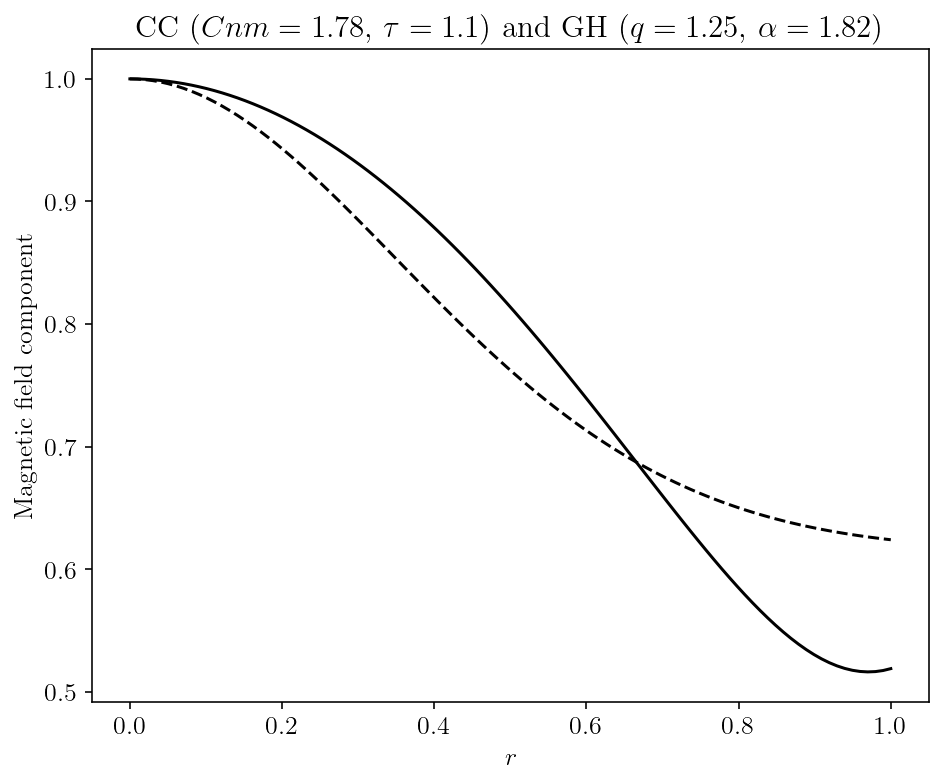

In [18]:
N = 100;
[n,m] = [1,0]
Cnm = 1.78 # [0.5,2]
tau = 1.1 # [0,4]
qs = np.linspace(0, 2, 100)
alphas = np.linspace(1, 10, 100)
[q_approx, alpha_approx] = Teresa_to_GH(n,m,Cnm,tau,qs,alphas,N)

#print('Best q: ' + str(np.round(q_approx,2)))
#print('Best alpha: ' + str(np.round(alpha_approx,2)))
r = np.linspace(0, 1, N)
comparison(r,n,m,Cnm,tau,q_approx,alpha_approx)
modulus_comparison(r,n,m,Cnm,tau,q_approx,alpha_approx)

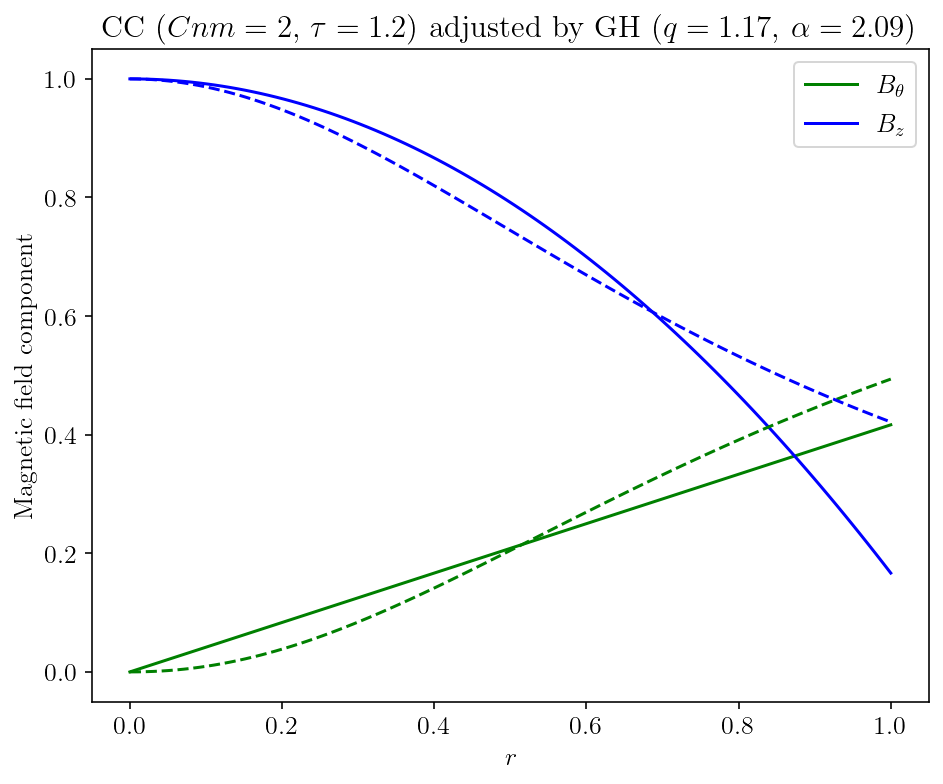

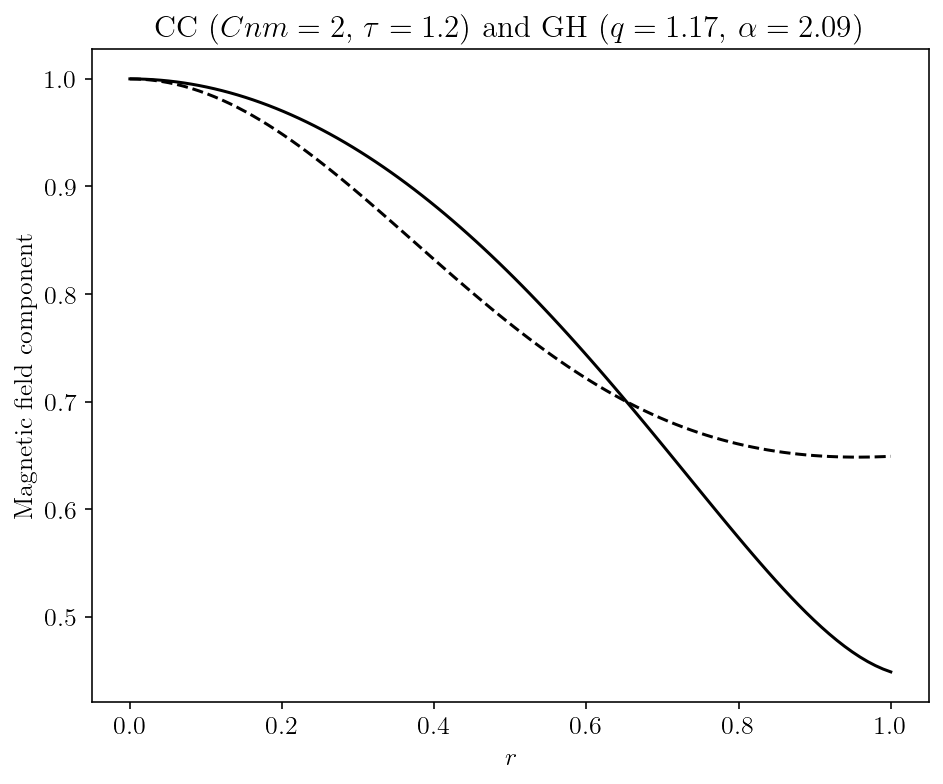

In [19]:
N = 100;
[n,m] = [1,0]
Cnm = 2 # [0.5,2]
tau = 1.2 # [0,4]
qs = np.linspace(0, 2, 100)
alphas = np.linspace(1, 10, 100)
[q_approx, alpha_approx] = Teresa_to_GH(n,m,Cnm,tau,qs,alphas,N)

#print('Best q: ' + str(np.round(q_approx,2)))
#print('Best alpha: ' + str(np.round(alpha_approx,2)))
r = np.linspace(0, 1, N)
comparison(r,n,m,Cnm,tau,q_approx,alpha_approx)
modulus_comparison(r,n,m,Cnm,tau,q_approx,alpha_approx)

# Twist plots

In [13]:
def twist_GH(r,q,alpha):
    plt.figure()
    plt.rcParams["figure.figsize"] = (7.5, 6)
    plt.rcParams.update({'font.size': 13})
    plt.title(r"Twist GH modified model ($q = {}$, $\alpha = {}$)".format(np.round(q,2), np.round(alpha,2)))
    plt.xlabel('$r$')
    plt.ylabel('$Q(r)$')
    plt.plot(r, Btheta(r, q, alpha)/(r*Bz(r, q, alpha)), 'r--')
    plt.show()
    
def twist_Teresa(r,n,m,q,alpha):
    plt.figure()
    plt.rcParams["figure.figsize"] = (7.5, 6)
    plt.rcParams.update({'font.size': 13})
    plt.title(r"Twist CC Nieves-Chinchilla model ($Cnm = {}$, $\tau = {}$)".format(np.round(q,2), np.round(alpha,2)))
    plt.xlabel('$r$')
    plt.ylabel('$Q(r)$')
    plt.plot(r, TBtheta(r, n, m, q, alpha)/(r*TBz(r, n, m, q, alpha)), 'r--')
    plt.show()
    
def twist_comparison(r,n,m,Cnm,tau,q,alpha):
    plt.figure()
    plt.rcParams["figure.figsize"] = (7.5, 6)
    plt.rcParams.update({'font.size': 13})
    plt.title(r"CC ($Cnm = {}$, $\tau = {}$) adjusted by GH ($q = {}$, $\alpha = {}$)".format(np.round(Cnm,2), np.round(tau,2), np.round(q,2), np.round(alpha,2)))
    plt.xlabel('$r$')
    plt.ylabel('$Q(r)$')
    plt.plot(r, r**m/(Cnm*(tau-r**(n+1))), 'r')
    plt.plot(r, q*r**(alpha-1), 'r--')
    #plt.plot(r, TBtheta(r, n, m, Cnm, tau)/(r*TBz(r, n, m, Cnm, tau)), 'r')
    #plt.plot(r, Btheta(r, q, alpha)/(r*Bz(r, q, alpha)), 'r--')
    plt.legend([r"CC", "$GH$"])
    plt.show()

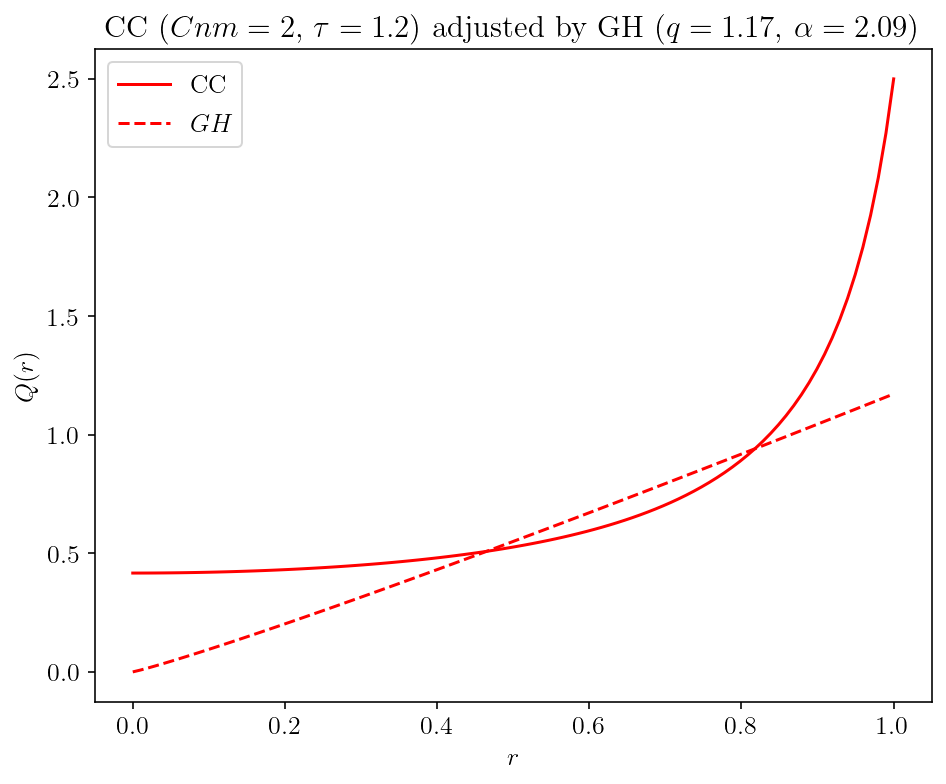

In [20]:
twist_comparison(r,n,m,Cnm,tau,q_approx,alpha_approx)